<a href="https://colab.research.google.com/github/kendzisah/DeepImageClassifier/blob/main/Deep_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Depencies and setting up Computer

In [ ]:
pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Preparing/Cleaning Data

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'drive/MyDrive/datasets'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image{}'.format(image_path))

Loading Data

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 190 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# gets another batch from the iterator
batch = data_iterator.next()

In [ ]:
# Prints out an array containing labels in the current batch. Class 1 = Sad people, Class 2 = happy people
batch[1]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

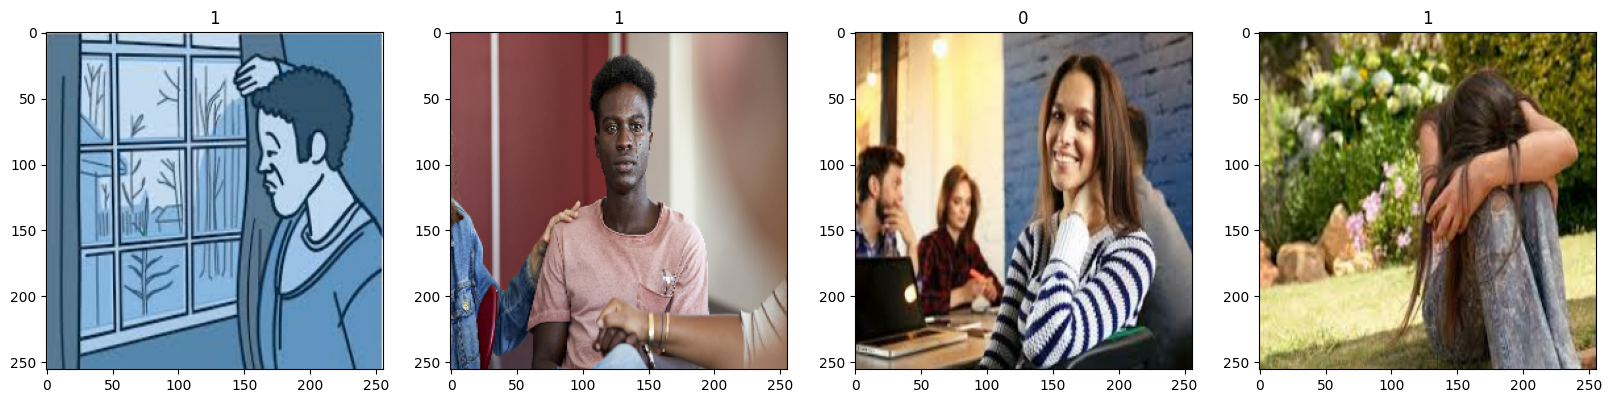

In [ ]:
# to figure out what each label represents (e.g. happy or sad)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocess Data


In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[9.92447913e-01, 9.92447913e-01, 9.92447913e-01],
          [9.99126852e-01, 9.99126852e-01, 9.99126852e-01],
          [9.92884517e-01, 9.92884517e-01, 9.92884517e-01],
          ...,
          [7.93451309e-01, 7.93451309e-01, 7.93451309e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01]],
 
         [[9.88126159e-01, 9.88126159e-01, 9.88126159e-01],
          [9.98876989e-01, 9.98876989e-01, 9.98876989e-01],
          [9.91056740e-01, 9.91056740e-01, 9.91056740e-01],
          ...,
          [7.91969836e-01, 7.91969836e-01, 7.91969836e-01],
          [7.91023314e-01, 7.91023314e-01, 7.91023314e-01],
          [7.91023314e-01, 7.91023314e-01, 7.91023314e-01]],
 
         [[9.75971997e-01, 9.75971997e-01, 9.75971997e-01],
          [9.92310762e-01, 9.92310762e-01, 9.92310762e-01],
          [9.86312807e-01, 9.86312807e-01, 9.86312807e-01],
          ...,
          [7.90688753e-01, 7.90688753e-01, 7.9068

Deep Model

Building Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
# first layer needs to have an input or be an input layer.
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Training Deep Learning Model: 1:02:50